In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data from the csv file
df=pd.read_csv('auto-mpg.csv',na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
df['horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
94.0      1
167.0     1
158.0     1
137.0     1
107.0     1
Name: horsepower, Length: 93, dtype: int64

In [6]:
#filling the null values with the mean values of the horsepower
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

In [7]:
df['car name'].value_counts()

ford pinto                  6
amc matador                 5
ford maverick               5
toyota corolla              5
peugeot 504                 4
                           ..
buick electra 225 custom    1
mazda rx-7 gs               1
oldsmobile vista cruiser    1
mercury marquis brougham    1
dodge charger 2.2           1
Name: car name, Length: 305, dtype: int64

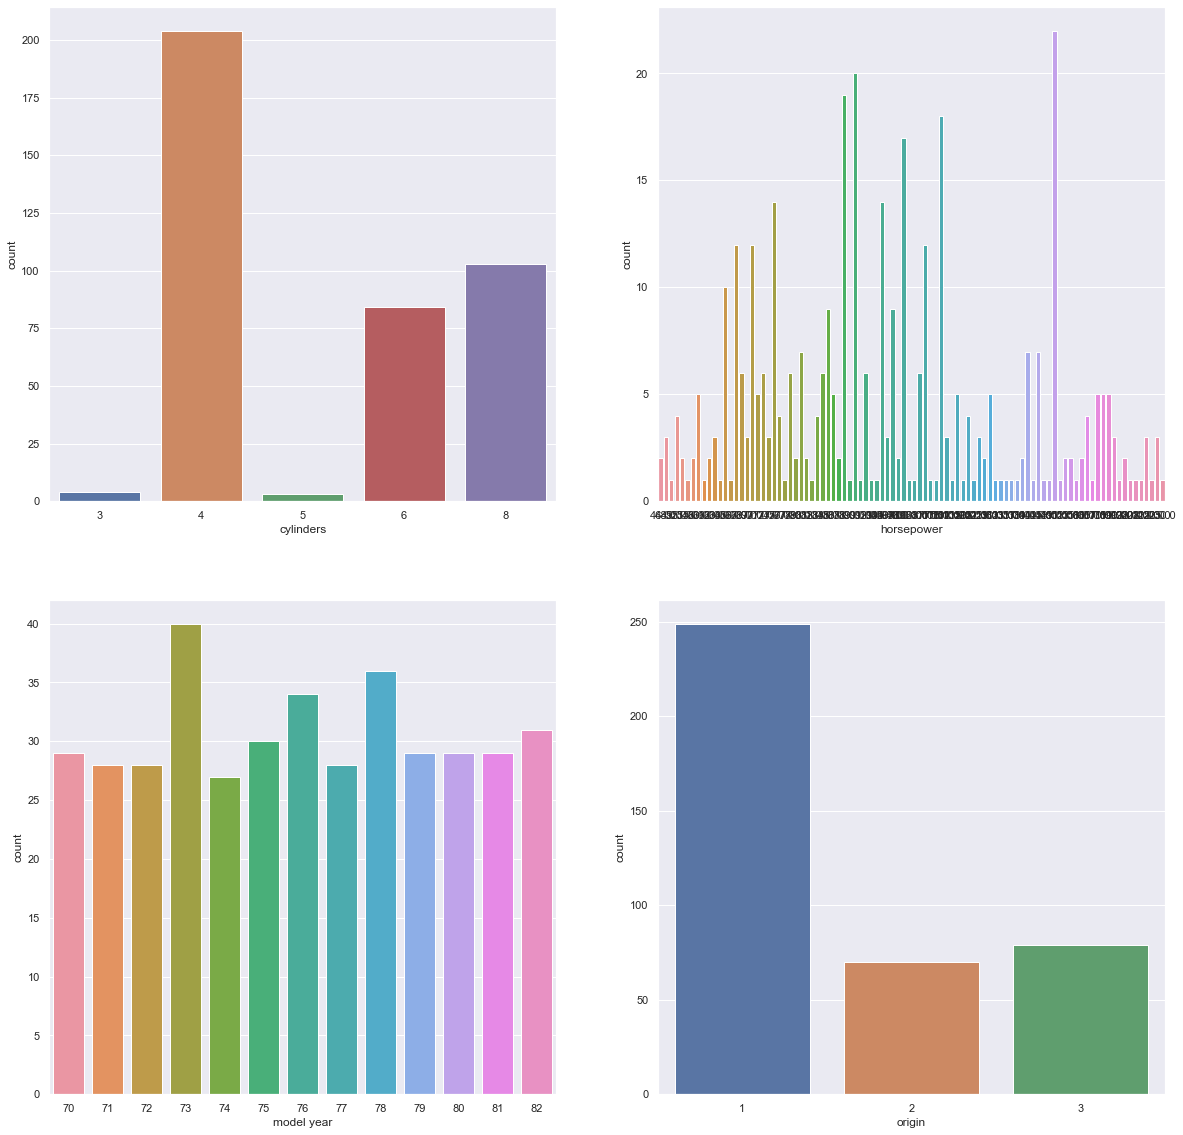

In [8]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,20)
sns.set_style('dark')
sns.countplot(x='cylinders',data=df,ax=axes[0][0])
sns.countplot(x='horsepower',data=df,ax=axes[0][1])
sns.countplot(x='model year',data=df,ax=axes[1][0])
sns.countplot(x='origin',data=df,ax=axes[1][1])

plt.show()

In [ ]:
#most number of vehicles are of origin1
#most number of the vehicles are of model year 73-74
#most number of vehicles have 4 cylinders

In [9]:
#dropping the car name as we have to predict the miles per gallon (mpg)
df.drop(['car name'],axis=1,inplace=True)

In [10]:
df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64

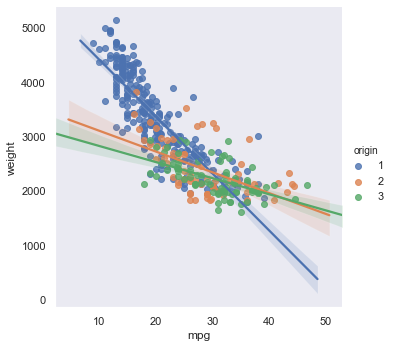

In [11]:
sns.lmplot(x='mpg',y='weight',hue='origin',data=df)

In [ ]:
# from above we can see that as weight increases mpg decreases

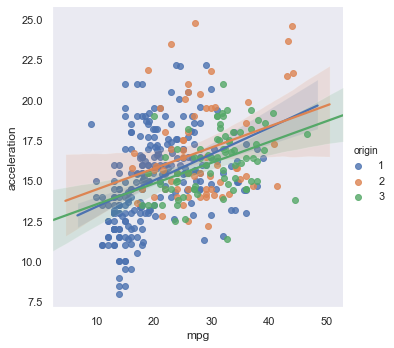

In [12]:
sns.lmplot(x='mpg',y='acceleration',hue='origin',data=df)

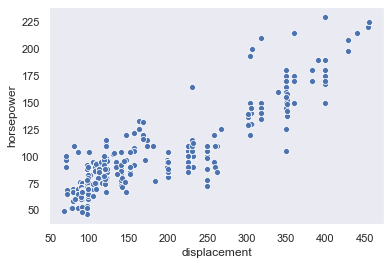

In [13]:
sns.scatterplot(x='displacement',y='horsepower',data=df)

In [ ]:
# from above we can see that more horsepower is required for larger displacement

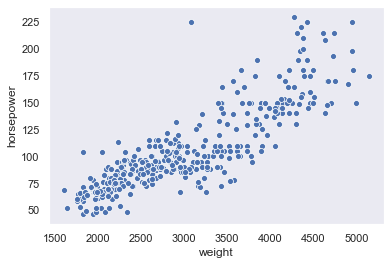

In [14]:
sns.scatterplot(x='weight',y='horsepower',data=df)

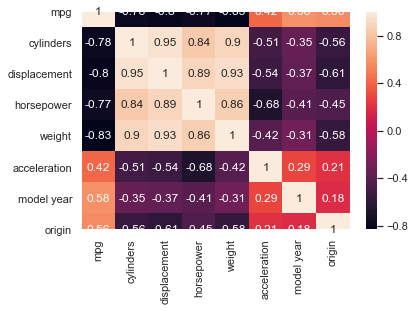

In [15]:
hmap=df.corr()
sns.heatmap(hmap,annot=True)

In [16]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.095552
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df))


In [18]:
#removing te outliers
df=df[(z<3).all(axis=1)]

In [19]:
df.shape

(391, 8)

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [21]:
x=df.iloc[:,1:]
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [22]:
y=df.iloc[:,0:1]
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [23]:
#Using the PCA technique to reduce teh dimensionality as few variables are largely correlated to each-other
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x=pca.fit_transform(x)

In [24]:
x=pd.DataFrame(data=x)

In [25]:
max_rscore=0
for r_state in range(42,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=r=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2_score corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state
print()
print("max R2 score corresponding to r_state is",final_r_state,"is:",max_rscore)

R2_score corresponding to random state: 42 is: 0.8299581998189639
R2_score corresponding to random state: 43 is: 0.8301323352435361
R2_score corresponding to random state: 44 is: 0.8121962127263482
R2_score corresponding to random state: 45 is: 0.7970173045007996
R2_score corresponding to random state: 46 is: 0.8292429996868209
R2_score corresponding to random state: 47 is: 0.7704784437552324
R2_score corresponding to random state: 48 is: 0.8175692374469856
R2_score corresponding to random state: 49 is: 0.8209924668502129
R2_score corresponding to random state: 50 is: 0.8406381090415137
R2_score corresponding to random state: 51 is: 0.8126699442398808
R2_score corresponding to random state: 52 is: 0.832374455328742
R2_score corresponding to random state: 53 is: 0.8068198665521348
R2_score corresponding to random state: 54 is: 0.7970586010830045
R2_score corresponding to random state: 55 is: 0.7954544010170576
R2_score corresponding to random state: 56 is: 0.8257909165603683
R2_score co

In [26]:
lr.coef_

array([[-0.00748468, -0.01549294, -0.04771262, -0.75717895,  0.07944874,
         1.15497554]])

In [27]:
#using Lasso technique to minimize the coefficients
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(x_train,y_train)

def evaluate(x,y,dataset):
    pred=lassoreg.predict(x)
    score=lassoreg.score(x,y)
    r2_scr=r2_score(y,pred)
    rmsle=np.sqrt(mean_squared_log_error(y,pred))
    print('The R2 Score is',r2_scr)
    print('The score is',score)
    print('The root mean squared error is',rmsle)
evaluate(x_train,y_train,"training")
evaluate(x_test,y_test,"test")

The R2 Score is 0.8153300014248365
The score is 0.8153300014248365
The root mean squared error is 0.14617660216114614
The R2 Score is 0.7898375368689572
The score is 0.7898375368689572
The root mean squared error is 0.14531093922782515


In [28]:
#using Ridge technique to minimize the coefficients
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge
ridgereg=Ridge()
ridgereg.fit(x_train,y_train)

def evaluate(x,y,dataset):
    pred=ridgereg.predict(x)
    score=ridgereg.score(x,y)
    r2_scr=r2_score(y,pred)
    rmsle=np.sqrt(mean_squared_log_error(y,pred))
    print('The R2 Score is',r2_scr)
    print('The score is',score)
    print('The root mean squared error is',rmsle)
evaluate(x_train,y_train,"training")
evaluate(x_test,y_test,"test")

The R2 Score is 0.8256365065437908
The score is 0.8256365065437908
The root mean squared error is 0.14587650125079954
The R2 Score is 0.8026832889737721
The score is 0.8026832889737721
The root mean squared error is 0.1451460966405749


In [37]:
#Using Support vector Algorithm
from sklearn.svm import SVR
model=SVR(kernel='linear')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(model, param_grid, cv=3)

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
grid_search.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
model = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
      

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8167101748245922
The r2 Score is: 0.8167101748245922
The score is: 0.7965215600750499
The r2 Score is: 0.7965215600750499


In [49]:
from sklearn.ensemble import RandomForestRegressor
mode_new=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid1_search = GridSearchCV(model_new, params, cv = 3)

In [50]:
grid1_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=20, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25, None],
                         'min_samples_lea

In [51]:
grid1_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import r2_score
model_new = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
        

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9604709780715444
The r2 Score is: 0.9604709780715444
The score is: 0.8577213407346763
The r2 Score is: 0.8577213407346762


In [53]:
#Found that the Random Forest Regressor is giving teh best results. Hence considering the model

In [54]:
from sklearn.externals import joblib
joblib.dump(model_new,'auto-mpg_regression.pkl')

['auto-mpg_regression.pkl']